In [1]:
#Importing liberaries 
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error 
import numpy as np
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import math
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading the data file
df=pd.read_csv('dataz.csv')
df

,date,location,bedrooms,bathrooms,Area_Marla,price
0,5/17/2020,"D-12/3, D-12",8.0,8.0,24.0,120000000
1,11/17/2020,"D-12, Islamabad",5.0,5.0,4.4,26500000
2,3/17/2021,"D-12, Islamabad",4.0,5.0,5.0,29000000
3,4/17/2021,"D-12/2, D-12",8.0,8.0,24.0,110000000
4,4/17/2021,"D-12/1, D-12",4.0,4.0,4.0,29000000
...,...,...,...,...,...,...
297,2/17/2022,"D-12, Islamabad",2.0,2.0,4.0,95000000
298,2/17/2022,"D-12, Islamabad",2.0,2.0,4.0,15800000
299,2/17/2022,"D-12, Islamabad",3.0,4.0,4.4,25500000
300,2/17/2022,"D-12/2, D-12",7.0,8.0,8.0,70000000


In [3]:
# Convert Month into Datetime
df['date']=pd.to_datetime(df['date'])

In [4]:
#Indexing the 
df.set_index('date',inplace=True)

In [5]:
#Statistics of the data
df.describe()

,bedrooms,bathrooms,Area_Marla,price
count,246.000000,242.000000,302.00000,3.020000e+02
mean,5.154472,5.665289,8.67053,5.692228e+07
std,2.068352,2.151800,6.98033,3.368112e+07
min,2.000000,2.000000,3.30000,1.000000e+07
25%,4.000000,4.000000,4.00000,3.000000e+07
50%,5.000000,5.000000,7.00000,4.650000e+07
75%,6.000000,7.000000,10.00000,7.000000e+07
max,11.000000,10.000000,80.00000,1.650000e+08


In [6]:
#Types of columns
df.dtypes

location       object
bedrooms      float64
bathrooms     float64
Area_Marla    float64
price           int64
dtype: object

In [7]:
#looking for Null values we have zero nan values 
df.isnull().sum()

location       0
bedrooms      56
bathrooms     60
Area_Marla     0
price          0
dtype: int64

In [8]:
#Median of bedrooms 
import math
median_bedrooms =  math.floor(df['bedrooms'].median()) 
#Median of bathrooms
median_bathrooms =  math.floor(df['bathrooms'].median()) 

In [9]:
df['bedrooms'].fillna(median_bedrooms , inplace = True)
df['bathrooms'].fillna(median_bathrooms , inplace = True)

In [10]:
df.head()

,location,bedrooms,bathrooms,Area_Marla,price
date,,,,,
2020-05-17,"D-12/3, D-12",8.0,8.0,24.0,120000000
2020-11-17,"D-12, Islamabad",5.0,5.0,4.4,26500000
2021-03-17,"D-12, Islamabad",4.0,5.0,5.0,29000000
2021-04-17,"D-12/2, D-12",8.0,8.0,24.0,110000000
2021-04-17,"D-12/1, D-12",4.0,4.0,4.0,29000000


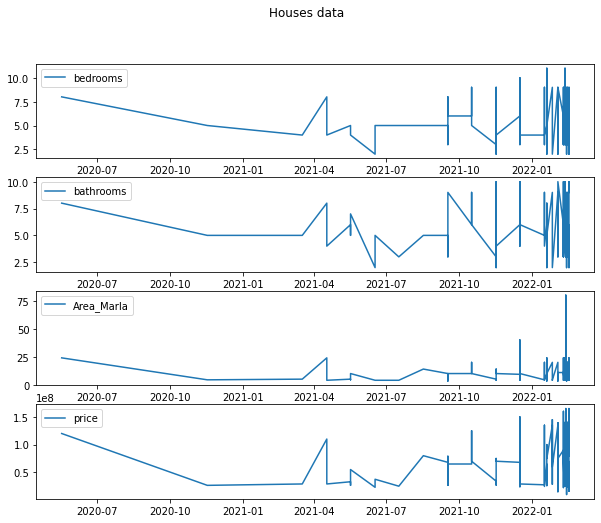

In [11]:
#Plotting the data
fig = plt.figure(figsize=(10,8))

plt.subplot(411)
plt.plot(df['bedrooms'], label='bedrooms')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df['bathrooms'], label='bathrooms')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df['Area_Marla'],label='Area_Marla')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df['price'], label='price')
plt.legend(loc='best')

fig.suptitle('Houses data')
plt.show()

In [12]:
from statsmodels.tsa.arima_model import ARIMA 

In [13]:
#Decompose the data with the help of location column
lst_locations=list(df['location'].unique())
lst_locations

['D-12/3, D-12',
 'D-12, Islamabad',
 'D-12/2, D-12',
 'D-12/1, D-12',
 'D-12/4, D-12',
 'Karsaaz Villas, D-12',
 'D-12 Markaz, D-12']

In [97]:
def forecastData(location,marla,newdf):
    newdf1 = newdf.loc[newdf['Area_Marla'] == marla]
    #Fitting the model
    model="";
    my_dict={}
    
    rms_val=0
    if (len(newdf1['price'])>6):
        
        model=ARIMA(newdf1['price'],order=(0,0,2))
        model_fit=model.fit()


        #Plotting the price and model data
        plt.figure(figsize=[15,5])
        plt.xlabel('Date')
        plt.title('Actual Vs Predictions')
        plt.ylabel('Price')
        plt.plot(newdf1['price'])
        plt.plot(model_fit.fittedvalues, color='red')
        plt.show()

        #Plotting and forecasting the price values 
        model_fit.plot_predict(1,365) 
        x1=model_fit.forecast(steps=365)
        plt.show()

        #Future Values of future houses price
        print("#########################################")
        print(f"Future Prices for {location} with {marla} Marlas")
        print(x1[0])
        print("#########################################")

        #Evaluate the result using RMSE on trianing 
        print("#########################################")
        value1 = newdf1['price'] 
        value2 = model_fit.fittedvalues
#         evaluation=np.sqrt(mean_squared_error(value1,value2))
#         rms_val=evaluation
#         print(f"RMSE results: {evaluation}")
        print("#########################################")
        print("#########################################")
        print('Actual vs predicted')
        
        
        lst_dates=list(newdf1.index)
        date=lst_dates[-1]
        for_dates=[]
        for i in range(len(x1[0])): 
            date += timedelta(days=1)
            for_dates.append(date)
            print(date) 
        
        for_dates[0]=lst_dates[-1]
        plt.figure(figsize=(15,8))
        plt.plot(for_dates,x1[0],marker="o")
        plt.plot(lst_dates,newdf1['price'],marker="o")
        plt.title("Forecasting Results")
        plt.show()
        
        ############################################
        # Creating a Dictionary
        ############################################
        
        median_bedrooms =  int(math.floor(newdf['bedrooms'].median()))
        #Median of bathrooms
        median_bathrooms =  int(math.floor(newdf['bathrooms'].median()))
        lst_all_dates=[]
        lst_all_marlas=[]
        lst_all_beds=[]
        lst_all_baths=[]
        lst_all_prices=[]
        lst_all_locs=[]
        
        lst_all_dates=list(newdf.index)
        lst_all_marlas=list(newdf['Area_Marla'])
        lst_all_beds=list(newdf['bedrooms'])
        lst_all_baths=list(newdf['bathrooms'])
        lst_all_prices=list(newdf['price'])
        lst_all_locs=list(newdf['location'])
        
        #total_size=len(lst_df_dates)+len(x1[0])
        for i in range(len(x1[0])):
            lst_all_dates.append(for_dates[i])
            lst_all_marlas.append(marla)
            lst_all_beds.append(median_bedrooms)
            lst_all_baths.append(median_bathrooms)
            lst_all_prices.append(round(x1[0][i]))
            lst_all_locs.append(location)
            
        
    
    
            
        
        
        my_dict={
            "date":lst_all_dates,
            "location":lst_all_locs,
            "bedrooms":lst_all_beds,
            "bathrooms":lst_all_beds,
            "Area_Marla":lst_all_marlas,
            "price":lst_all_prices
        }
        
        
        my_dict=pd.DataFrame(my_dict,index=[i for i in range(len(lst_all_dates))])
        
        
        print("#########################################")
        
        
        
    
    return rms_val,my_dict
    

In [98]:
def runMyFunc():
    lst_locations=list(df['location'].unique())
    lst_locations
    lst_all_data=[]
    lst_all_rms=[]
    for loc in lst_locations:
        #Selecting only D-12/3, D-12 area values 
        newdf = df.loc[df['location'] == loc]
        #Now selecting onlt 4 marla houese 
        lst_area=list(newdf['Area_Marla'].unique())
        for area in lst_area:
            rms,data=forecastData(loc,area,newdf)
#             if(rms>0):
            lst_all_data.append(data)
            lst_all_rms.append(rms)

    
    return lst_all_rms,lst_all_data
        
        
    
    

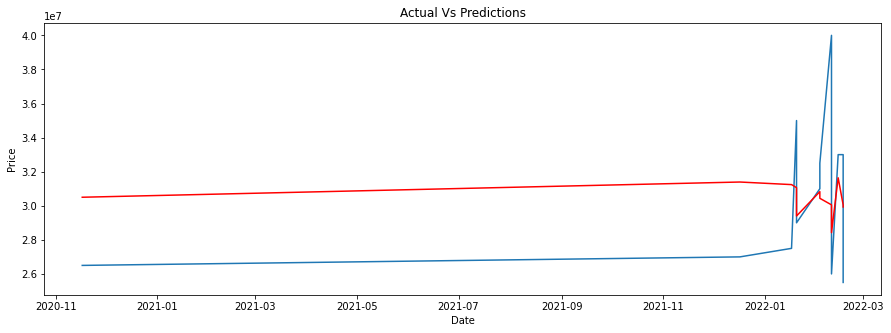

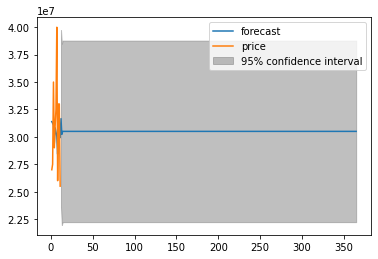

#########################################
Future Prices for D-12, Islamabad with 4.4 Marlas
[31660566.60946914 30230846.70429106 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.00000001 30500000.00000001 30500000.00000001
 30500000.00000001 30500000.0000

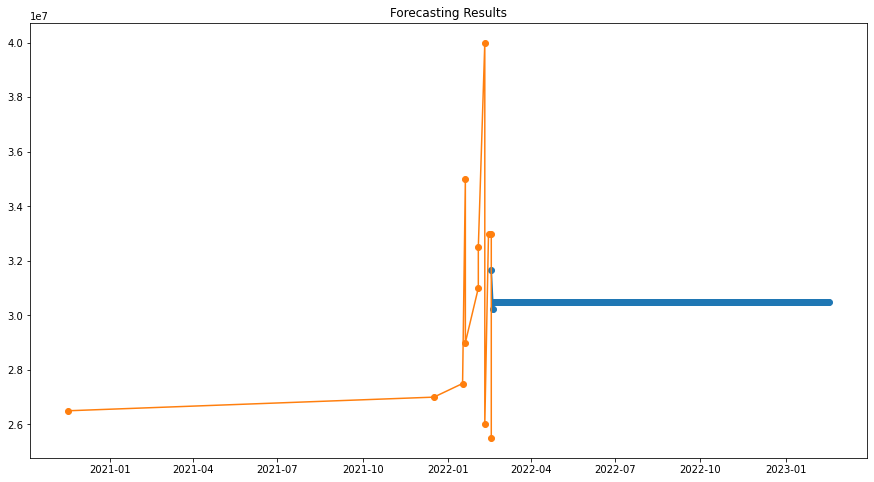

#########################################


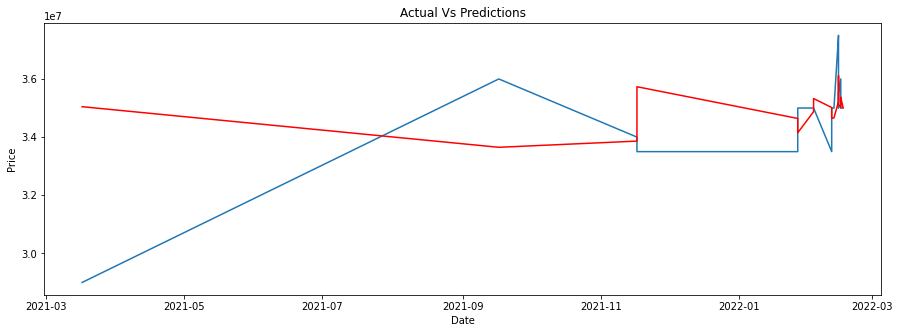

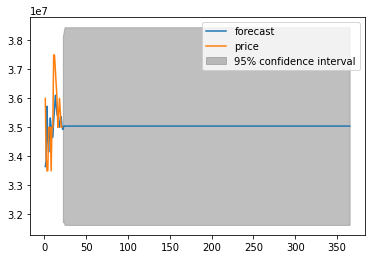

#########################################
Future Prices for D-12, Islamabad with 5.0 Marlas
[34930851.71194386 35041107.77354633 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.54545338 35045454.54545338 35045454.54545338
 35045454.54545338 35045454.5454

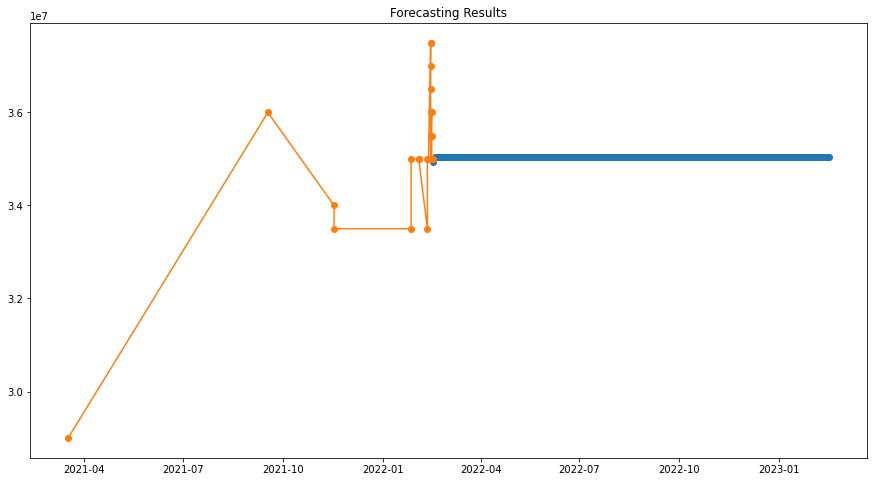

#########################################


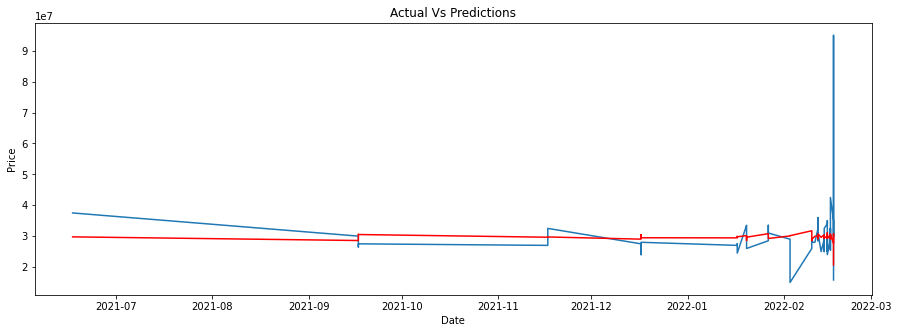

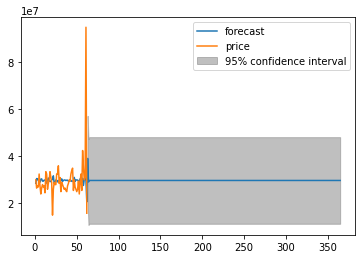

#########################################
Future Prices for D-12, Islamabad with 4.0 Marlas
[39140741.49593204 29113167.43429568 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.15873016 29758730.15873016 29758730.15873016
 29758730.15873016 29758730.1587

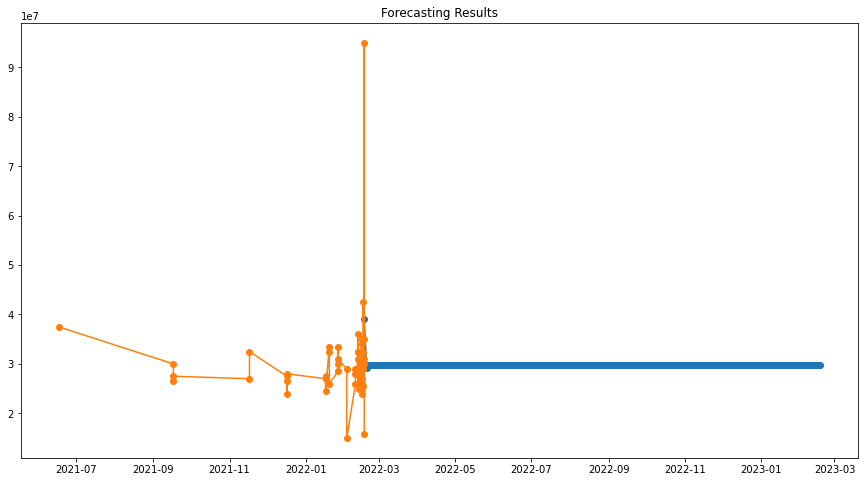

#########################################


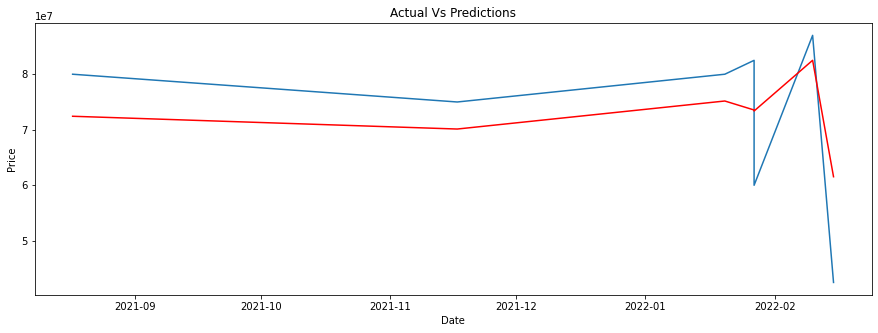

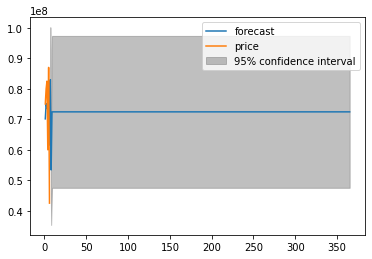

#########################################
Future Prices for D-12, Islamabad with 14.0 Marlas
[82995683.15594907 53390237.23910223 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.42857109 72428571.42857109 72428571.42857109
 72428571.42857109 72428571.428

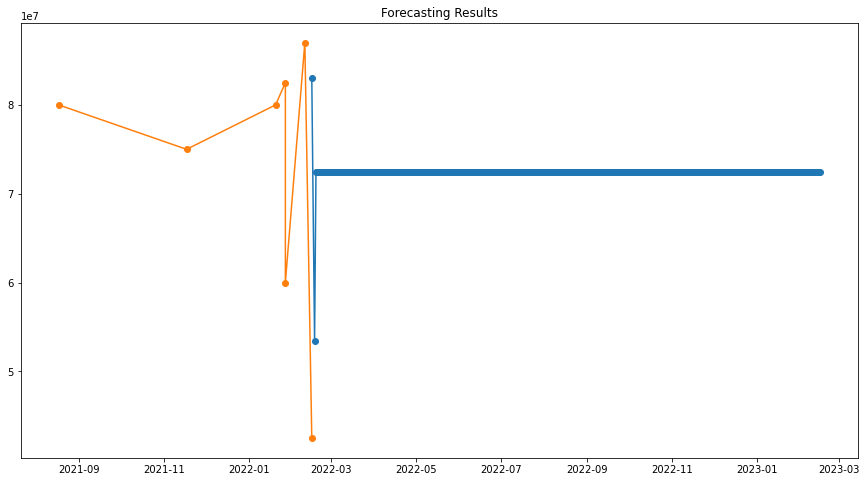

#########################################


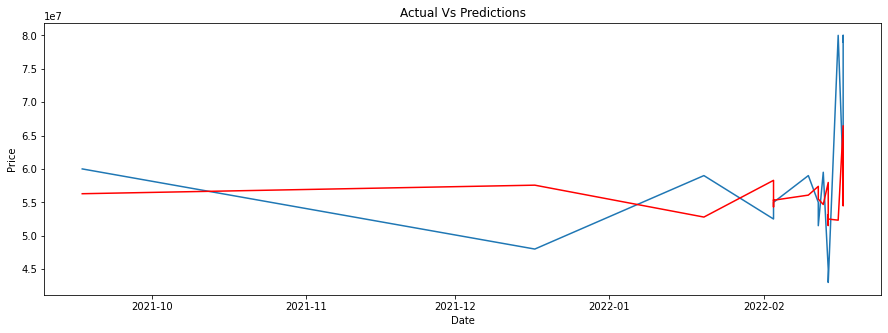

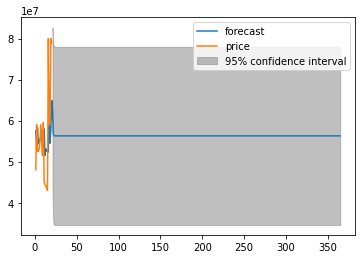

#########################################
Future Prices for D-12, Islamabad with 8.0 Marlas
[62487434.87673248 56820996.72453477 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.28571427 56285714.28571427 56285714.28571427
 56285714.28571427 56285714.2857

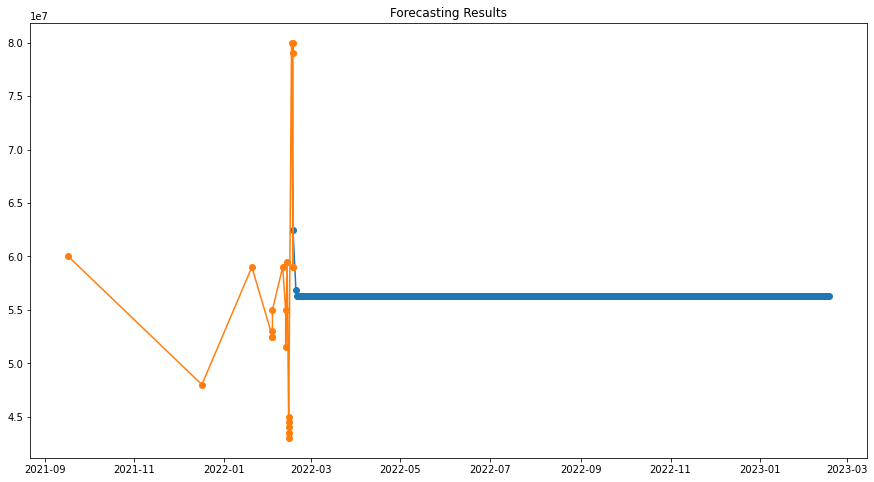

#########################################


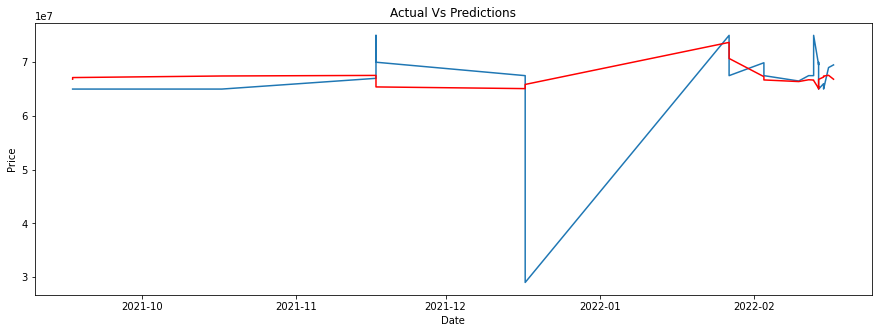

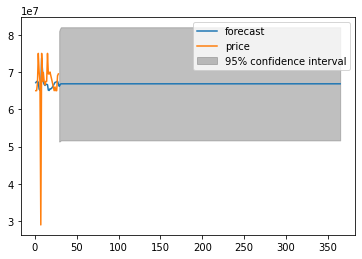

#########################################
Future Prices for D-12, Islamabad with 10.0 Marlas
[66166173.75920039 66543937.58564678 66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  66841379.3103448  66841379.3103448
 66841379.3103448  66841379.3103448  668413

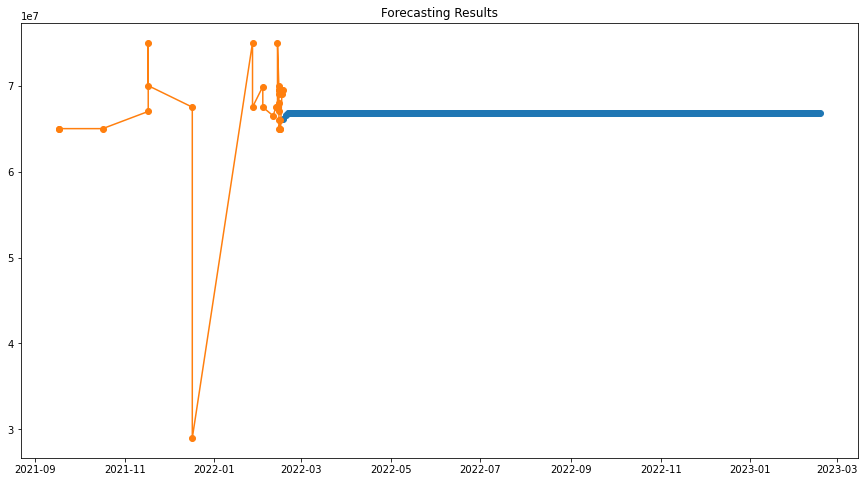

#########################################


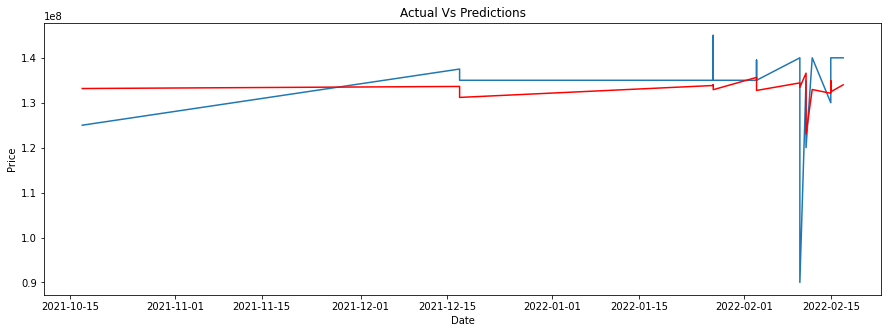

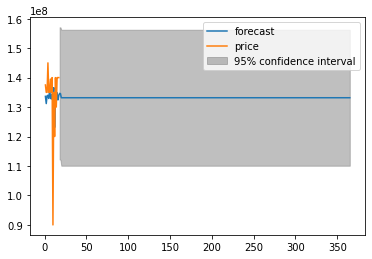

#########################################
Future Prices for D-12, Islamabad with 20.0 Marlas
[1.34648861e+08 1.34575016e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166667e+08
 1.33166667e+08 1.33166667e+08 1.33166667e+08 1.33166

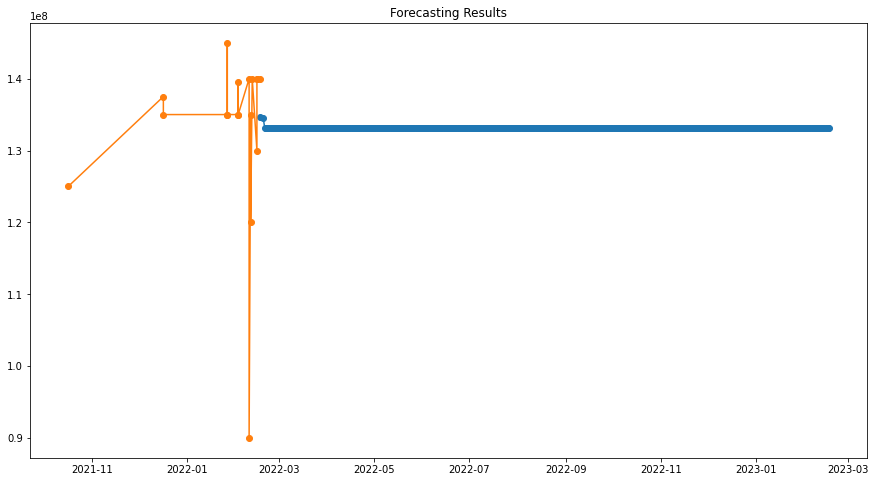

#########################################


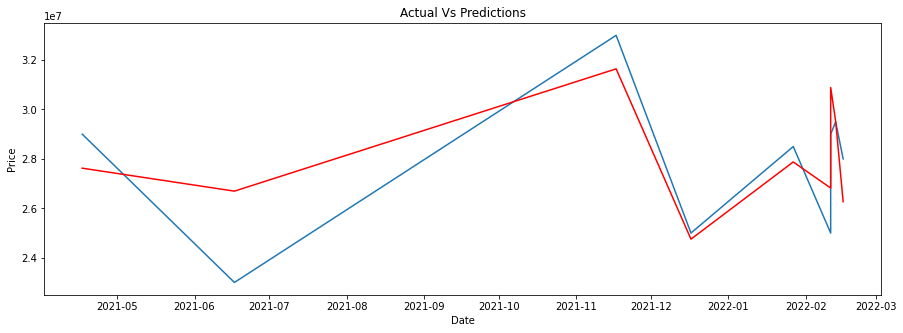

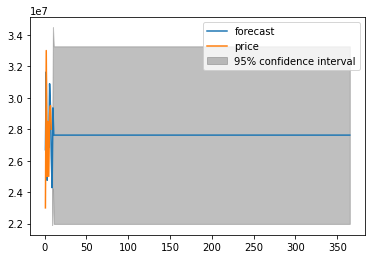

#########################################
Future Prices for D-12/1, D-12 with 4.0 Marlas
[24280983.29270633 29355956.45957956 27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7445839  27624151.7445839
 27624151.7445839  27624151.7445839  27624151.7

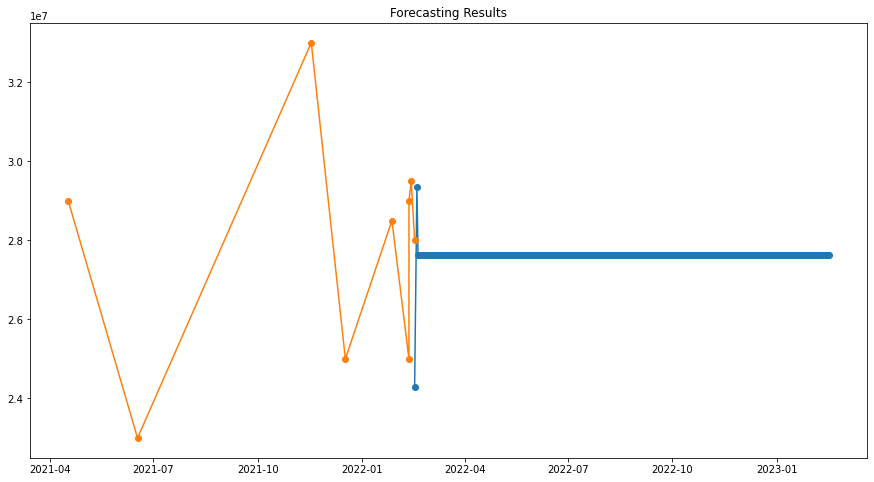

#########################################


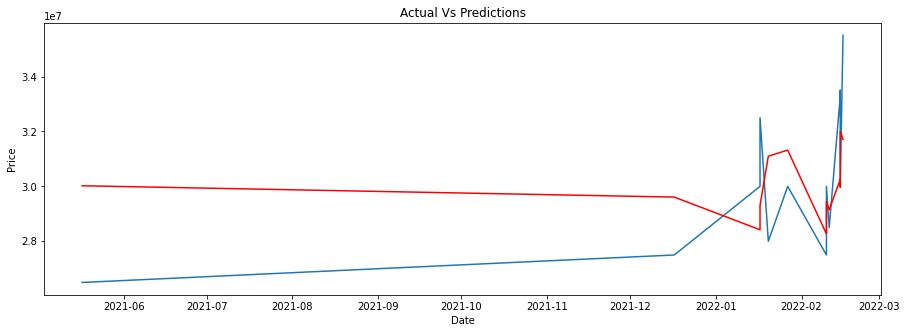

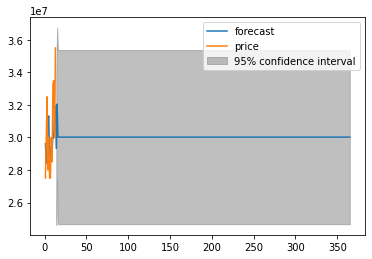

#########################################
Future Prices for D-12/1, D-12 with 4.4 Marlas
[29323544.15356643 32052505.19404605 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.57142784 30021428.57142784 30021428.57142784
 30021428.57142784 30021428.5714278

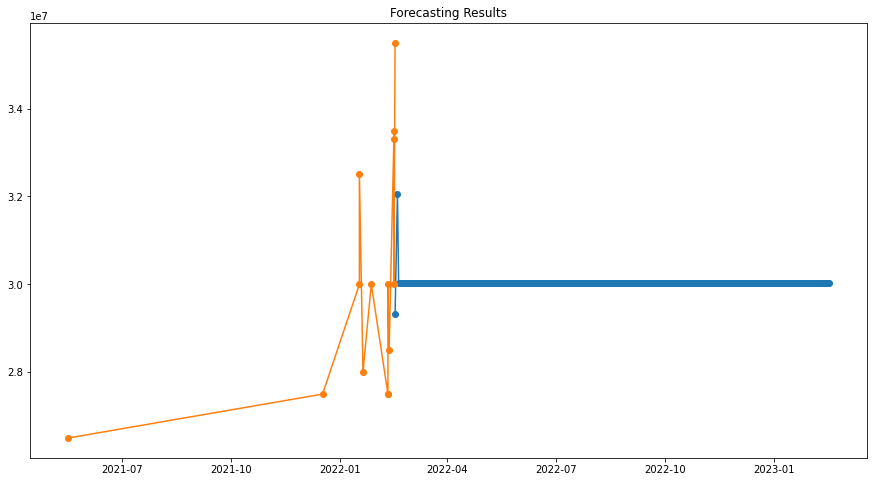

#########################################


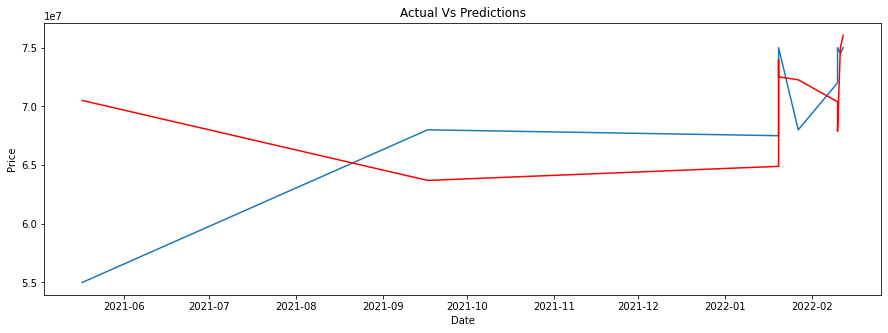

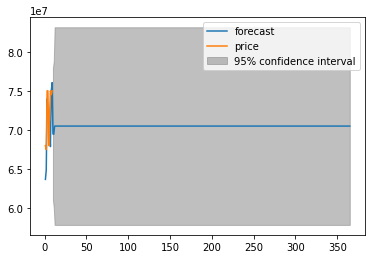

#########################################
Future Prices for D-12/1, D-12 with 10.0 Marlas
[69495977.10134587 69455050.45986661 70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   70500000.005941
 70500000.005941   70500000.005941   70500000.005941   705

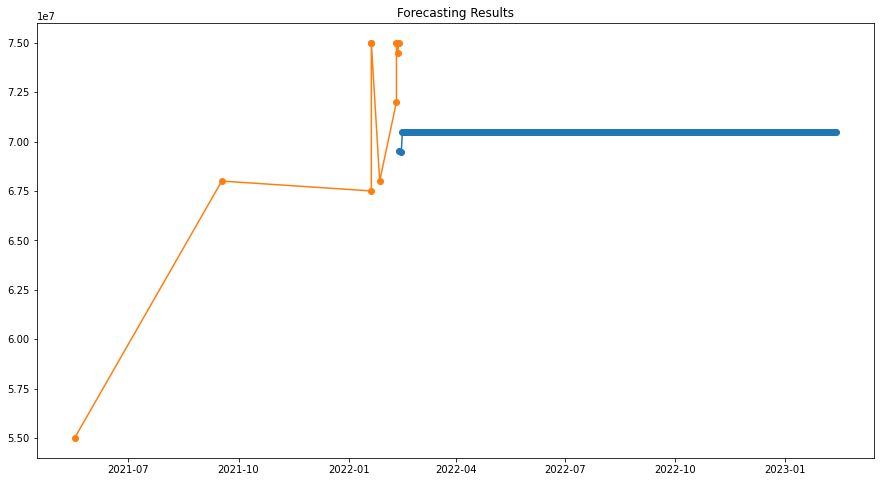

#########################################


In [99]:
mRms,mData=runMyFunc()

In [73]:
my_dict={
            "date":[0],
            "location":[0],
            "bedrooms":[0],
            "bathrooms":[0],
            "Area_Marla":[0],
            "price":[0]
        }

In [88]:
df_res=pd.DataFrame(my_dict,index=[0])
df_res

,date,location,bedrooms,bathrooms,Area_Marla,price
0,0,0,0,0,0,0


In [89]:
len(mData[0])

0

In [90]:
for dt in mData:
    if(len(dt)>0):
        df_res=df_res.append(dt)
        
# df_res=df_res.append(mData[1:],ignore_index=True)

df_res=df_res[1:]

In [91]:
df_res.head()

,date,location,bedrooms,bathrooms,Area_Marla,price
0,2020-11-17 00:00:00,"D-12, Islamabad",5.0,5.0,4.4,26500000.0
1,2021-03-17 00:00:00,"D-12, Islamabad",4.0,4.0,5.0,29000000.0
2,2021-06-17 00:00:00,"D-12, Islamabad",5.0,5.0,4.0,37500000.0
3,2021-08-17 00:00:00,"D-12, Islamabad",5.0,5.0,14.0,80000000.0
4,2021-09-17 00:00:00,"D-12, Islamabad",3.0,3.0,5.0,36000000.0


In [92]:
df_res.tail()

,date,location,bedrooms,bathrooms,Area_Marla,price
407,2023-02-08 00:00:00,"D-12/1, D-12",4.0,4.0,10.0,877605672.0
408,2023-02-09 00:00:00,"D-12/1, D-12",4.0,4.0,10.0,879827894.0
409,2023-02-10 00:00:00,"D-12/1, D-12",4.0,4.0,10.0,882050117.0
410,2023-02-11 00:00:00,"D-12/1, D-12",4.0,4.0,10.0,884272339.0
411,2023-02-12 00:00:00,"D-12/1, D-12",4.0,4.0,10.0,886494561.0


In [93]:
df_res.corr()

,bedrooms,bathrooms,Area_Marla,price
bedrooms,1.000000,1.000000,0.412701,-0.062104
bathrooms,1.000000,1.000000,0.412701,-0.062104
Area_Marla,0.412701,0.412701,1.000000,-0.055829
price,-0.062104,-0.062104,-0.055829,1.000000


In [26]:
df_res.describe()

,bedrooms,bathrooms,Area_Marla,price
count,5940.000000,5940.000000,5940.000000,5.940000e+03
mean,4.849327,4.849327,8.142677,5.388146e+07
std,1.060086,1.060086,5.489296,3.035437e+07
min,2.000000,2.000000,3.300000,1.500000e+07
25%,4.000000,4.000000,4.400000,3.002143e+07
50%,5.000000,5.000000,5.000000,3.750000e+07
75%,5.000000,5.000000,10.000000,6.950000e+07
max,11.000000,11.000000,80.000000,1.650000e+08


In [27]:
df_res.to_csv("Forecaseted_data.csv")

In [29]:
pd.DataFrame(mData[9]).head(50)

,date,location,bedrooms,bathrooms,Area_Marla,price
0,2021-04-17,"D-12/1, D-12",4.0,4.0,4.0,29000000.0
1,2021-05-17,"D-12/1, D-12",5.0,5.0,5.0,33000000.0
2,2021-05-17,"D-12/1, D-12",5.0,5.0,4.4,26500000.0
3,2021-05-17,"D-12/1, D-12",4.0,4.0,10.0,55000000.0
4,2021-06-17,"D-12/1, D-12",2.0,2.0,4.0,23000000.0
5,2021-09-17,"D-12/1, D-12",5.0,5.0,10.0,68000000.0
6,2021-11-17,"D-12/1, D-12",5.0,5.0,4.0,33000000.0
7,2021-11-17,"D-12/1, D-12",4.0,4.0,5.0,33000000.0
8,2021-12-17,"D-12/1, D-12",4.0,4.0,4.0,25000000.0
9,2021-12-17,"D-12/1, D-12",4.0,4.0,4.4,27500000.0


In [1]:
my_dic={"index":[i for i in range(10)],
       "val1":[i for i in range(10)],
       "val2":[i for i in range(10)]}

In [2]:
import pandas as pd

C:\Users\Amjid_Khan_Mohmand\AppData\Roaming\Python\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Amjid_Khan_Mohmand\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Amjid_Khan_Mohmand\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df=pd.DataFrame(my_dic,index=[i for i in range(10)])

In [4]:
df.head()

,index,val1,val2
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [5]:
df.rename(columns={"val1":"x1"})

,index,x1,val2
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5
6,6,6,6
7,7,7,7
8,8,8,8
9,9,9,9
